# Sample Code for deconvolution
***

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

from deconv.deconv import Deconvolution

In [11]:
file_mix=""
file_ref=""
file_annotation_ref="D:/Gdrive/datasource/ann_file/Rat_transcriptID_RGD.csv"

#df_mix=pd.read_csv(file_mix, index_col=0)
#df_ref=pd.read_csv(file_ref, index_col=0)
df_annotation_ref=pd.read_csv(file_annotation_ref)

In [12]:
df = pd.read_csv("D:/Gdrive/notebook/2004_Transcriptome_Deconvolution/220217_RNAseq_reanalysis/data/gene.txt",index_col=0,delimiter="\t")
df_mix = df.loc[:,(df.columns.str.contains("liver")) | (df.columns.str.contains("wbc")) | (df.columns.str.contains("spleen"))]
df_ref = df.drop(df_mix.columns.tolist(), axis=1)
df_mix.columns = [f"{i.split('_')[0]}_{i.split('_')[1]}" if not 'liver' in i else f"{i.split('_')[0]}{i.split('_')[1]}_{i.split('_')[2]}" for i in df_mix.columns]

In [13]:
dat = Deconvolution()

In [14]:
dat.set_data(df_mix, df_ref)

In [15]:
dat.preprocessing_mix(df_ref=df_annotation_ref, places=[0,1],
                      trimming=True,batch=False,combat=False,
                      trans_method="log2",
                      norm_method_list=["quantile"])

dat.preprocessing_ref(df_ref=df_annotation_ref, places=[0,1],
                      trimming=False,batch=False,combat=False,
                      trans_method="log2",
                      norm_method_list=["raw"])

method : ttest
extracted genes number = 7675
extracted genes number = 2422
extracted genes number = 4949
extracted genes number = 4330
extracted genes number = 6021
extracted genes number = 2651
signature genes : 1090


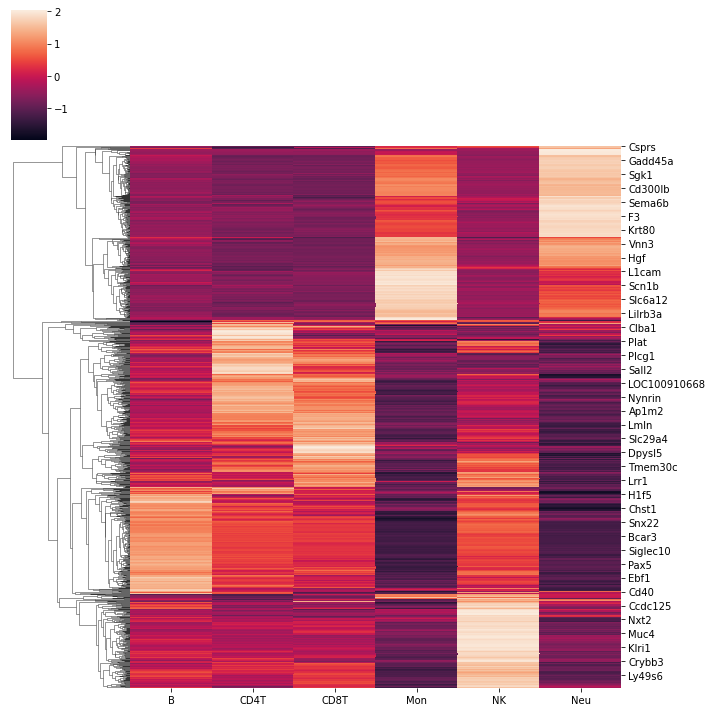

In [16]:
dat.deg(method="ttest",
        sep="_",number=200,limit_CV=1,limit_FC=1.,log2=False,q_limit=0.05,
        plot=True)

In [17]:
dat.fit(method="elasticnet")

method:  elasticnet


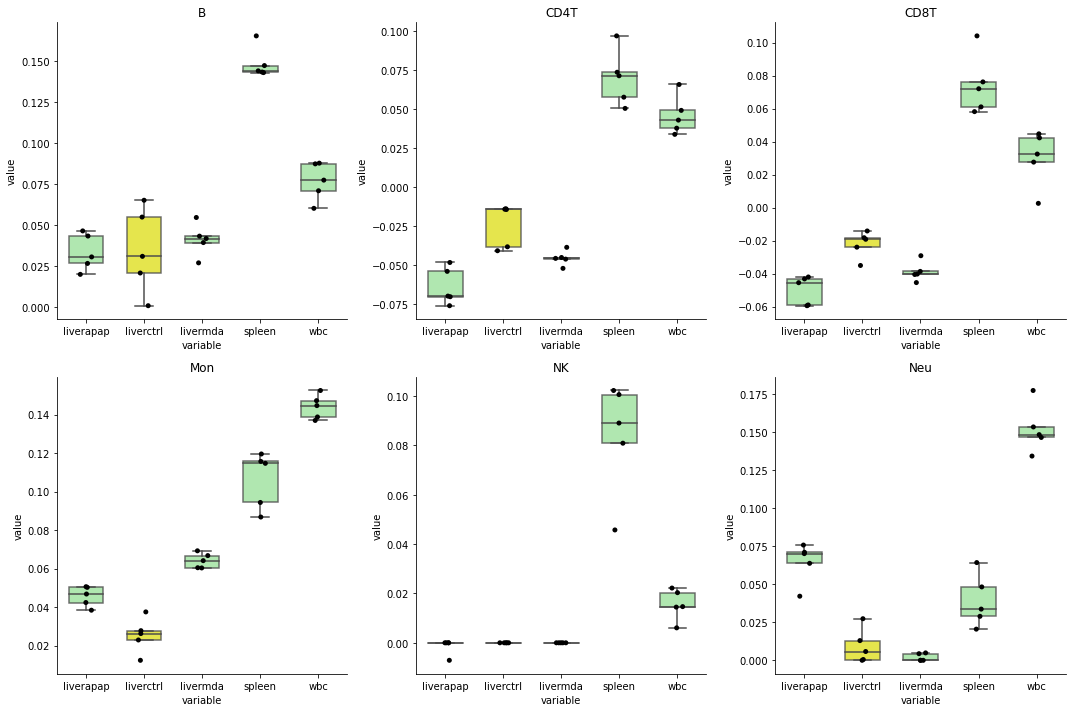

In [18]:
dat.plot_res(control_names=["liverctrl"],sep="_")

In [23]:
dat.get_data()[0].head() # mix data

,liverapap_1,liverapap_2,liverapap_3,liverapap_4,liverapap_5,liverctrl_1,liverctrl_2,liverctrl_3,liverctrl_4,liverctrl_5,...,spleen_1,spleen_2,spleen_3,spleen_4,spleen_5,wbc_1,wbc_2,wbc_3,wbc_4,wbc_5
A2ml1,3.522699,3.746749,1.941771,2.732101,2.621112,2.308900,2.988218,2.304446,3.495648,3.428959,...,0.380268,1.997824,1.450627,1.138466,1.091560,1.382269,1.605305,2.421953,1.676822,2.381184
A3galt2,4.216530,4.629981,3.789416,4.663236,4.265909,3.988870,2.178978,3.733009,3.671084,2.211819,...,4.886805,4.821101,4.462369,4.791192,4.865698,3.529596,3.897193,4.311509,4.003798,4.363558
Aaas,5.953376,6.002359,5.812393,5.909046,5.840827,5.607603,5.479257,5.605117,5.524509,5.480748,...,5.737721,5.748852,5.735753,5.749861,5.655542,5.499438,5.391660,5.258168,5.497907,5.621711
Aacs,4.571227,4.865973,4.680680,4.220220,4.348891,5.503997,5.040444,5.074996,5.144222,5.091525,...,5.932491,5.951402,5.833129,5.960038,5.935807,6.045654,6.005782,6.109933,5.996571,6.004418
Aagab,5.733058,5.922432,5.710360,5.590786,5.671610,5.706614,5.676596,5.635728,5.464229,5.652216,...,6.247559,6.181959,6.144124,6.189884,6.175069,5.942051,5.901297,5.911592,5.813569,6.011820


In [24]:
dat.get_data()[1].head() # reference data

,B,CD4T,CD8T,Mon,NK,Neu
Myl4,3.932490,1.848050,2.632411,1.653911,3.909127,1.602289
Gpr153,2.051376,2.749643,3.351339,0.948516,1.898230,1.840442
Stap2,2.242633,2.283102,1.692515,0.000000,0.911436,0.000000
Zap70,9.264444,10.381931,10.517478,8.547165,10.608477,8.662859
Kcnj5,3.916191,2.535282,2.525491,0.748509,2.863883,1.016559


In [25]:
dat.get_res().head() # deconvolution result

,B,CD4T,CD8T,Mon,NK,Neu
liverapap_1,0.026734,-0.053823,-0.042004,0.050256,-0.000000,0.063692
liverapap_2,0.043411,-0.070046,-0.059406,0.038384,-0.007095,0.070937
liverapap_3,0.020073,-0.069650,-0.058953,0.050594,-0.000000,0.075698
liverapap_4,0.046532,-0.075798,-0.045462,0.042367,0.000000,0.070076
liverapap_5,0.030692,-0.048149,-0.043183,0.046793,0.000000,0.042104
